In [1]:
import requests     
import json         
import pandas as pd 
from bs4 import BeautifulSoup
import json
import re
import csv
from io import StringIO
from datetime import datetime
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")
import os


In [2]:
os.chdir('C:\\Users\\fizpo')

In [3]:
Transactions = pd.read_csv('Transactions.csv')

In [4]:
Transactions.head(n = 2)

,Data,Czas,Produkt,ISIN,Giełda referenc,Miejsce wykonania,Liczba,Kurs,Unnamed: 8,Wartość lokalna,Unnamed: 10,Wartość,Unnamed: 12,Kurs wymian,Opłata transakcyjna,Unnamed: 15,Razem,Unnamed: 17,Identyfikator zlecenia
0,02-02-2022,17:31,PAYPAL HOLDINGS INC.,US70450Y1038,NDQ,CDED,1,131.75,USD,-131.75,USD,-116.63,EUR,1.1296,-0.5,EUR,-117.13,EUR,b9d097fb-1969-49dc-ab52-6e9ed379444e
1,04-01-2022,20:37,APPLE INC. - COMMON ST,US0378331005,NDQ,CDED,1,179.80,USD,-179.80,USD,-159.24,EUR,1.1291,-0.5,EUR,-159.74,EUR,5a614ead-62b9-47f8-b045-d15a7c14c99d


In [5]:
exchCode = [None]*len(Transactions)
Transactions['exchCode'] = exchCode
Transactions = Transactions.rename({'Data' : 'date', 'Czas':'time', 'Produkt': 'product','ISIN':'isin',
                                    'Giełda referenc':'stock_exchange', 'Miejsce wykonania':'execution_place',
                                    'Liczba':'number', 'Kurs':'price','Unnamed: 8':'trans_curr', 'Wartość lokalna':'local_value',
                                    'Unnamed: 10':'curr_local_value', 'Wartość' : 'price_eu', 
                                    'Unnamed: 12':'account_curr','Kurs wymian':'exchange_rate', 'Opłata transakcyjna':'commission',
                                    'Unnamed: 15':'commission_curr','Razem': 'total_eu', 'Unnamed: 17':'total_curr',
                                    'Identyfikator zlecenia': 'order_id'}, axis= 1)
Transactions = Transactions.drop('order_id', axis = 1)
Transactions['date'] = Transactions['date'].astype(str) + ' ' + Transactions['time'].astype(str)
Transactions['date'] = pd.to_datetime(Transactions['date'],dayfirst=True)
Transactions = Transactions.sort_values('date').reset_index(drop=True) 

In [6]:
Transactions.head()

,date,time,product,isin,stock_exchange,execution_place,number,price,trans_curr,local_value,curr_local_value,price_eu,account_curr,exchange_rate,commission,commission_curr,total_eu,total_curr,exchCode
0,2020-03-18 09:02:00,09:02,VANGUARD S&P500,IE00B3XXRP09,LSE,XLON,1,38.000,GBP,-38.00,GBP,-41.67,EUR,0.9119,-2.01,EUR,-43.68,EUR,None
1,2020-03-26 16:33:00,16:33,BANK OF AMERICA CORPOR,US0605051046,NSY,CDED,1,22.445,USD,-22.45,USD,-20.39,EUR,1.1010,-0.50,EUR,-20.89,EUR,None
2,2020-03-26 17:38:00,17:38,DELTA AIR LINES INC.,US2473617023,NSY,XNAS,1,35.000,USD,-35.00,USD,-31.75,EUR,1.1025,-0.50,EUR,-32.25,EUR,None
3,2020-03-30 15:30:00,15:30,DELTA AIR LINES INC.,US2473617023,NSY,XNYS,1,28.110,USD,-28.11,USD,-25.49,EUR,1.1028,-0.50,EUR,-25.99,EUR,None
4,2020-03-31 14:01:00,14:01,ISHRC S&P 500,IE00B5BMR087,LSE,XLON,1,260.000,USD,-260.00,USD,-237.33,EUR,1.0955,-2.07,EUR,-239.40,EUR,None


In [7]:
Transactions['isin'].unique()

array(['IE00B3XXRP09', 'US0605051046', 'US2473617023', 'IE00B5BMR087',
       'US0088751062', 'US00848K1016', 'US8762142060', 'US0400476075',
       'US80105N1054', 'US3755581036', 'US9216591084', 'US5949181045',
       'US44148G1058', 'US30303M1027', 'US89151E1091', 'US30231G1022',
       'US4581401001', 'US4781601046', 'US0378331005', 'US9311421039',
       'US46625H1005', 'US92826C8394', 'US01609W1027', 'US88034P1093',
       'NL0009805522', 'US16939P1066', 'US92343X1000', 'US0846707026',
       'US34959E1091', 'US78781P1057', 'IL0011691438', 'US7427181091',
       'US70450Y1038', 'US87105L1044', 'US79466L3024', 'US67066G1040',
       'US65339F1012'], dtype=object)

In [8]:
Transactions['stock_exchange'].unique()

array(['LSE', 'NSY', 'NDQ', 'ASE', 'DEG'], dtype=object)

In [9]:
closed_pos

NameError: name 'closed_pos' is not defined

In [10]:
closed_pos = pd.DataFrame()
current_pos = pd.DataFrame()
for produkt in (Transactions['product'].unique()):
    k = Transactions[Transactions['product'] == produkt]
    s = 0
    for i in range (len(k)):
        s += k.iloc[i][6]
    if s == 0:
        closed_pos = closed_pos.append(k,ignore_index = True)
    else:
        current_pos = current_pos.append(k,ignore_index = True)
    

In [11]:
items_closed

NameError: name 'items_closed' is not defined

In [12]:
items_closed = list(zip(closed_pos['isin'],closed_pos['stock_exchange'], closed_pos['exchCode'],closed_pos['trans_curr']))
items_current = list(zip(current_pos['isin'],current_pos['stock_exchange'], current_pos['exchCode'],current_pos['trans_curr']))

In [13]:
stocks_closed

NameError: name 'stocks_closed' is not defined

In [14]:
stocks_closed = []
for item in items_closed:
    stock = list(item)
    stocks_closed.append(stock)

In [15]:
stocks_current = []
for item in items_current:
    stock = list(item)
    stocks_current.append(stock)

In [16]:
for i in range (len(stocks_closed)):
    if stocks_closed[i][1] in ('NDQ', 'NSY','ASE'):
        stocks_closed[i][2] = 'US'
    elif stocks_closed[i][1] == 'LSE':
        stocks_closed[i][2] = 'LN'
    elif stocks_closed[i][0] == 'US8762142060' or stocks[i][1] == 'DEG' :
        stocks_closed[i][2] = 'US'
        stocks_closed[i][3] = 'USD'

In [17]:
items_closed

[('IE00B3XXRP09', 'LSE', None, 'GBP'),
 ('IE00B3XXRP09', 'LSE', None, 'GBP'),
 ('US0605051046', 'NSY', None, 'USD'),
 ('US0605051046', 'NSY', None, 'USD'),
 ('US2473617023', 'NSY', None, 'USD'),
 ('US2473617023', 'NSY', None, 'USD'),
 ('US2473617023', 'NSY', None, 'USD'),
 ('IE00B5BMR087', 'LSE', None, 'USD'),
 ('IE00B5BMR087', 'LSE', None, 'USD'),
 ('US0088751062', 'NDQ', None, 'USD'),
 ('US0088751062', 'NDQ', None, 'USD'),
 ('US0088751062', 'NDQ', None, 'USD'),
 ('US0088751062', 'NDQ', None, 'USD'),
 ('US00848K1016', 'ASE', None, 'USD'),
 ('US00848K1016', 'ASE', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US8762142060', 'NDQ', None, 'USD'),
 ('US0400476075', 'NDQ', None, 'USD'),
 ('US0400476075', 'NDQ', None, 'USD'),
 ('US80105N1054', 'NDQ', 

In [18]:
stocks_closed

[['IE00B3XXRP09', 'LSE', 'LN', 'GBP'],
 ['IE00B3XXRP09', 'LSE', 'LN', 'GBP'],
 ['US0605051046', 'NSY', 'US', 'USD'],
 ['US0605051046', 'NSY', 'US', 'USD'],
 ['US2473617023', 'NSY', 'US', 'USD'],
 ['US2473617023', 'NSY', 'US', 'USD'],
 ['US2473617023', 'NSY', 'US', 'USD'],
 ['IE00B5BMR087', 'LSE', 'LN', 'USD'],
 ['IE00B5BMR087', 'LSE', 'LN', 'USD'],
 ['US0088751062', 'NDQ', 'US', 'USD'],
 ['US0088751062', 'NDQ', 'US', 'USD'],
 ['US0088751062', 'NDQ', 'US', 'USD'],
 ['US0088751062', 'NDQ', 'US', 'USD'],
 ['US00848K1016', 'ASE', 'US', 'USD'],
 ['US00848K1016', 'ASE', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US8762142060', 'NDQ', 'US', 'USD'],
 ['US0400476075', 'NDQ', 'US', 'USD'],
 ['US0400476075', 'NDQ', 'US', 'USD'],
 ['US80105N1054', 'NDQ', 

In [19]:
for i in range (len(stocks_current)):
    if stocks_current[i][1] in ('NDQ', 'NSY','ASE'):
        stocks_current[i][2] = 'US'
    elif stocks_current[i][1] == 'LSE':
        stocks_current[i][2] = 'LN'
    elif stocks_current[i][0] == 'US8762142060' or stocks[i][1] == 'DEG' :
        stocks_current[i][2] = 'US'
        stocks_current[i][3] = 'USD'

In [20]:
jobs_closed = []
for i in range (len(stocks_closed)):
    job = {'idType': 'ID_ISIN', 'idValue': stocks_closed[i][0], 'exchCode': stocks_closed[i][2], 'currency': stocks_closed[i][3], "includeUnlistedEquities": True}
    jobs_closed.append(job)

In [21]:
jobs_closed

[{'idType': 'ID_ISIN',
  'idValue': 'IE00B3XXRP09',
  'exchCode': 'LN',
  'currency': 'GBP',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'IE00B3XXRP09',
  'exchCode': 'LN',
  'currency': 'GBP',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US0605051046',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US0605051046',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US2473617023',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US2473617023',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US2473617023',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'IE00B5BMR087',
  'exchCode': 'LN',
  'currency': 'USD',
  'i

In [22]:
jobs_current = []
for i in range (len(stocks_current)):
    job = {'idType': 'ID_ISIN', 'idValue': stocks_current[i][0], 'exchCode': stocks_current[i][2], 'currency': stocks_current[i][3],"includeUnlistedEquities": True}
    jobs_current.append(job)

In [23]:
openfigi_apikey = '844b2af4-4c56-455c-907d-3fc4b5226880'  
openfigi_url = 'https://api.openfigi.com/v2/mapping'
openfigi_headers = {'Content-Type': 'text/json'}

In [24]:
def map_jobs_closed(jobs_closed):
    if openfigi_apikey:
        openfigi_headers['X-OPENFIGI-APIKEY'] = openfigi_apikey
    response = requests.post(url=openfigi_url, headers=openfigi_headers,
                             json=jobs_closed)
    if response.status_code != 200:
        raise Exception('Bad response code {}'.format(str(response.status_code)))
    return response.json()
job_results_closed = map_jobs_closed(jobs_closed)

In [25]:
jobs_closed

[{'idType': 'ID_ISIN',
  'idValue': 'IE00B3XXRP09',
  'exchCode': 'LN',
  'currency': 'GBP',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'IE00B3XXRP09',
  'exchCode': 'LN',
  'currency': 'GBP',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US0605051046',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US0605051046',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US2473617023',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US2473617023',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'US2473617023',
  'exchCode': 'US',
  'currency': 'USD',
  'includeUnlistedEquities': True},
 {'idType': 'ID_ISIN',
  'idValue': 'IE00B5BMR087',
  'exchCode': 'LN',
  'currency': 'USD',
  'i

In [26]:
job_results_closed

[{'data': [{'figi': 'BBG003241JV5',
    'name': 'VANG S&P500 USDD',
    'ticker': 'VUSA',
    'exchCode': 'LN',
    'compositeFIGI': 'BBG003241JT8',
    'uniqueID': None,
    'securityType': 'ETP',
    'marketSector': 'Equity',
    'shareClassFIGI': 'BBG003241JZ1',
    'uniqueIDFutOpt': None,
    'securityType2': 'Mutual Fund',
    'securityDescription': 'VUSA'}]},
 {'data': [{'figi': 'BBG003241JV5',
    'name': 'VANG S&P500 USDD',
    'ticker': 'VUSA',
    'exchCode': 'LN',
    'compositeFIGI': 'BBG003241JT8',
    'uniqueID': None,
    'securityType': 'ETP',
    'marketSector': 'Equity',
    'shareClassFIGI': 'BBG003241JZ1',
    'uniqueIDFutOpt': None,
    'securityType2': 'Mutual Fund',
    'securityDescription': 'VUSA'}]},
 {'data': [{'figi': 'BBG000BCTLF6',
    'name': 'BANK OF AMERICA CORP',
    'ticker': 'BAC',
    'exchCode': 'US',
    'compositeFIGI': 'BBG000BCTLF6',
    'uniqueID': None,
    'securityType': 'Common Stock',
    'marketSector': 'Equity',
    'shareClassFIGI': 'B

In [27]:
job_results_closed

[{'data': [{'figi': 'BBG003241JV5',
    'name': 'VANG S&P500 USDD',
    'ticker': 'VUSA',
    'exchCode': 'LN',
    'compositeFIGI': 'BBG003241JT8',
    'uniqueID': None,
    'securityType': 'ETP',
    'marketSector': 'Equity',
    'shareClassFIGI': 'BBG003241JZ1',
    'uniqueIDFutOpt': None,
    'securityType2': 'Mutual Fund',
    'securityDescription': 'VUSA'}]},
 {'data': [{'figi': 'BBG003241JV5',
    'name': 'VANG S&P500 USDD',
    'ticker': 'VUSA',
    'exchCode': 'LN',
    'compositeFIGI': 'BBG003241JT8',
    'uniqueID': None,
    'securityType': 'ETP',
    'marketSector': 'Equity',
    'shareClassFIGI': 'BBG003241JZ1',
    'uniqueIDFutOpt': None,
    'securityType2': 'Mutual Fund',
    'securityDescription': 'VUSA'}]},
 {'data': [{'figi': 'BBG000BCTLF6',
    'name': 'BANK OF AMERICA CORP',
    'ticker': 'BAC',
    'exchCode': 'US',
    'compositeFIGI': 'BBG000BCTLF6',
    'uniqueID': None,
    'securityType': 'Common Stock',
    'marketSector': 'Equity',
    'shareClassFIGI': 'B

In [28]:
stocks_closed = [d['data'][0] for d in job_results_closed]

KeyError: 'data'

In [29]:
stocks_closed = pd.DataFrame.from_dict(stocks_closed)

In [30]:
d_closed = pd.DataFrame(list(zip(closed_pos['date'], closed_pos['time'], closed_pos['product'], 
                                 closed_pos['isin'], closed_pos['stock_exchange'], closed_pos['execution_place'],
                                 closed_pos['number'], closed_pos['price'], closed_pos['trans_curr'], closed_pos['local_value'],
                                 closed_pos['curr_local_value'],
                                 closed_pos['price_eu'], closed_pos['account_curr'], closed_pos['exchange_rate'],
                                 closed_pos['commission'], closed_pos['commission_curr'], closed_pos['total_eu'],
                                 closed_pos['total_curr'], closed_pos['exchCode'],
                                 stocks_closed['name'], stocks_closed['ticker']
                                )), columns = ['date', 'time', 'product', 'isin', 'stock_exchange', 'execution_place',
                                                'number', 'price', 'trans_curr', 'local_value', 'curr_local_value',
                                                'price_eu', 'account_curr', 'exchange_rate', 'commission',
                                                'commission_curr', 'total_eu', 'total_curr', 'exchCode', 'figi_name',
                                                'ticker'])


KeyError: 'name'

In [31]:
currency = [None]*len(d_closed)
pair_currency = [None]*len(d_closed)
d_closed['pair_currency'] = pair_currency
for i in range (len(d_closed)):
    if d_closed['trans_curr'][i] == 'USD':
        d_closed['pair_currency'][i] = 'EUR=X'
    elif d_closed['trans_curr'][i] == 'GBP':
        d_closed['pair_currency'][i] = 'GBPEUR=X'
    if d_closed['ticker'][i] == 'CSPX':
        d_closed['ticker'][i] = 'CSPX.L'
    if d_closed['ticker'][i] == 'VUSA':
        d_closed['ticker'][i] = 'VUSA.L'

NameError: name 'd_closed' is not defined

In [32]:
def map_jobs_current(jobs_current):
    if openfigi_apikey:
        openfigi_headers['X-OPENFIGI-APIKEY'] = openfigi_apikey
    response = requests.post(url=openfigi_url, headers=openfigi_headers,
                             json=jobs_current)
    if response.status_code != 200:
        raise Exception('Bad response code {}'.format(str(response.status_code)))
    return response.json()
job_results_current = map_jobs_current(jobs_current)

In [33]:
stocks_current = [d['data'][0] for d in job_results_current]

In [34]:
stocks_current = pd.DataFrame.from_dict(stocks_current)

In [35]:
d_current = pd.DataFrame(list(zip(current_pos['date'], current_pos['time'], current_pos['product'], 
                                 current_pos['isin'], current_pos['stock_exchange'], current_pos['execution_place'],
                                 current_pos['number'], current_pos['price'], current_pos['trans_curr'], current_pos['local_value'],
                                 current_pos['curr_local_value'],
                                 current_pos['price_eu'], current_pos['account_curr'], current_pos['exchange_rate'],
                                 current_pos['commission'], current_pos['commission_curr'], current_pos['total_eu'],
                                 current_pos['total_curr'], current_pos['exchCode'],
                                 stocks_current['name'], stocks_current['ticker']
                                )), columns = ['date', 'time', 'product', 'isin', 'stock_exchange', 'execution_place',
                                                'number', 'price', 'trans_curr', 'local_value', 'curr_local_value',
                                                'price_eu', 'account_curr', 'exchange_rate', 'commission',
                                                'commission_curr', 'total_eu', 'total_curr', 'exchCode', 'figi_name',
                                                'ticker'])

In [36]:
pair_currency = [None]*len(d_current)
d_current['pair_currency'] = pair_currency

In [37]:
for i in range (len(d_current)):
    if d_current['trans_curr'][i] == 'USD':
        d_current['pair_currency'][i] = 'EUR=X'
    elif d_current['trans_curr'][i] == 'GBP':
        d_current['pair_currency'][i] = 'GBPEUR=X'
    if d_current['ticker'][i] == 'BRK/B':
        d_current['ticker'][i] = 'BRK-B'


In [38]:
def parse_stock(stock,period1,period2):
    stock_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?'
    params = {
        'period1' : period1 ,
        'period2' : period2,
        'interval' : '1d',
        'events' : 'history'
    }
    response_stock = requests.get(stock_url.format(stock), params = params,headers={'User-agent': 'Mozilla/5.0'})
    file_stock = StringIO(response_stock.text)
    reader_stock = csv.reader(file_stock)
    data_stock = pd.DataFrame (reader_stock, columns = ['Data','Open','High','Low','Close','Adj Close','Volume']).drop([0])
    data_stock['Data'] = pd.to_datetime(data_stock['Data'], yearfirst=True)
    data_stock['Adj Close'] = pd.to_numeric(data_stock['Adj Close'])
    data_stock['Close'] = pd.to_numeric(data_stock['Close'])
    return data_stock

In [39]:
def parse_currency(currency,period1,period2):
    currency_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?'
    params = {
        'period1' : period1 ,
        'period2' : period2,
        'interval' : '1d',
        'events' : 'history'
    }
    response_currency = requests.get(currency_url.format(currency), params = params,headers={'User-agent': 'Mozilla/5.0'})
    file_currency = StringIO(response_currency.text)
    reader_currency = csv.reader(file_currency)
    fx = pd.DataFrame (reader_currency, columns = ['Data','Open','High','Low','Close','Adj Close','Volume']).drop([0])
    fx['Data'] = pd.to_datetime(fx['Data'], yearfirst=True)
    fx['Adj Close'] = pd.to_numeric(fx['Adj Close'])
    fx['Close'] = pd.to_numeric(fx['Close'])
    return fx

In [282]:
def weighted_average(price):
    return sum(price)/len(price)

In [41]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [102]:
current = d_current[['date','time','number','price','price_eu','exchange_rate','commission','ticker', 'pair_currency']]

In [43]:
j = 0
price_eur = []
price_usd = []
rate = []
average_price_eur = 0
average_price_usd = 0
average_exchange_rate = 0
value_eur = 0
value_usd = 0
df['average_bought_price_eur'] = [None]*len(df)
df['average_bought_price_usd'] = [None]*len(df)
df['average_exchange_rate'] = [None]*len(df)
df['value_eur'] = [None]*len(df)
df['value_usd'] = [None]*len(df)
for i in range (len(df)):
    if j < len(msft) and msft.iloc[j][0].date() == df.iloc[i][0]:
        for k in range (msft.iloc[j][2]):
            price_eur.append(-1*msft.iloc[j][4])
            price_usd.append(msft.iloc[j][3])
            value_eur = sum(price_eur)
            value_usd = sum(price_usd)
            rate.append(msft.iloc[j][5])
            average_price_eur = weighted_average(price_eur)
            average_price_usd = weighted_average(price_usd)
            average_exchange_rate = weighted_average(rate)
        j += 1
    df['value_eur'][i] = value_eur 
    df['value_usd'][i] = value_usd 
    df['average_bought_price_eur'][i] = average_price_eur
    df['average_bought_price_usd'][i] = average_price_usd
    df['average_exchange_rate'][i] = average_exchange_rate
df['gain_with_curr'] = (df['price_eur'] - df['average_bought_price_eur'])/df['average_bought_price_eur']
df['gain_without_curr'] = (df['price_usd'] - df['average_bought_price_usd'])/df['average_bought_price_usd']
df['gain_curr_in_percent'] = (df['average_exchange_rate']*df['exch_rate'] - 1)
df['gain_curr_in_eur'] = df['gain_curr_in_percent'] * df['value_eur']

NameError: name 'df' is not defined

In [44]:
# расчёт прибыли от покупки акции в долларах, без учёта коммиссий, налогов и дивидендов
def profit_usd(df,stock):
    j = 0
    price_usd = []
    average_price_usd = 0
    value_usd = 0
    df['average_bought_price_usd'] = [None]*len(df)
    for i in range (len(df)+1):
        if j < len(stock) and stock.iloc[j][0].date() == df.iloc[i][0]:
            for k in range (stock.iloc[j][2]):
                price_usd.append(stock.iloc[j][3])
                average_price_usd = weighted_average(price_usd)
            j += 1
        df['average_bought_price_usd'][i] = average_price_usd
    df['gain_without_curr'] = (df['price_usd'] - df['average_bought_price_usd'])/df['average_bought_price_usd']
    result = df[['Data','gain_without_curr']]
    return result

In [68]:
# period_start_EURX = int(current.sort_values('date')['date'][0].timestamp())
# period_end_EURX = int(datetime.now().timestamp())
# eurx = parse_currency('EUR=X',period_start_EURX, period_end_EURX)
# if stock['pair_currency'].unique()[0] != 'EUR=X' and len(stock['pair_currency'].unique()) == 1 :
#         currency = parse_currency(stock['pair_currency'].unique()[0],int(current.sort_values('date')['date'][0].timestamp())
#                                   ,period_2)
#         currency = currency.rename({'Adj Close':'exch_rate'}, axis = 1)
#         yahoo_stock = yahoo_stock.rename({'Adj Close':'price_usd'}, axis = 1)
#         df = yahoo_stock.merge(currency, on = 'Data', how = 'inner')[['Data','price_usd','exch_rate' ]]
#         profit_in_usd[item] = profit_usd(df,stock)
#         continue
# eurx = eurx.rename({'Adj Close':'exch_rate'}, axis = 1)
# df = yahoo_stock.merge(yahoo_curr, on = 'Data', how = 'inner')[['Data','price_usd','exch_rate' ]]

In [49]:
stock_list = current['ticker'].unique()

In [45]:
# проверяется условие неравентсва нулю цены за акцию, если же она равна нулю, строка добавляется в словарь
def test(stock,item):
    t = 0
    for i in range(len(stock)):
        if stock.iloc[i][3] == 0:
            not_bought[item] = stock.iloc[i]
            t += 1
    return t

In [174]:
# расчёт прибыли от покупки акции в долларах, без учёта коммиссий, налогов и дивидендов
big_table = pd.DataFrame()
big_table['Data'] = pd.date_range(start=current.sort_values('date')['date'][0].date(), end=datetime.now().date())
not_bought = {}
for item in stock_list:
        stock = current[current['ticker'] == item]
        if test(stock,item) > 0:
            continue
        stock.sort_values('date')
        stock['commission'] = stock['commission'].fillna(0)
        period_1 = int(stock.iloc[0][0].timestamp())
        period_2 = int(datetime.now().timestamp())
        df = parse_stock(item, period_1, period_2)  
        df = df.rename({'Adj Close':'price_usd'}, axis = 1)[['Data','price_usd']]
        small_table = profit_usd(df,stock)
        big_table[item] = big_table.merge(small_table, on='Data', how = 'left')['gain_without_curr']
big_table = big_table.fillna(0)
big_table['total'] = big_table.sum(axis = 1)

In [184]:
big_table.tail()

,Data,GILD,MSFT,META,TTE,XOM,INTC,JNJ,AAPL,WMT,JPM,V,BABA,TME,YNDX,LFC,VRNT,BRK-B,FTNT,SAIL,PG,PYPL,SWCH,CRM,NVDA,NEE,total
779,2022-06-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
780,2022-06-06,-0.177675,0.108533,-0.134802,0.453812,1.557640,-0.162593,0.189000,0.118668,-0.117371,0.125835,0.010583,-0.628522,-0.779132,-0.725428,-0.304193,-0.146759,0.214757,1.023232,0.119427,0.135579,-0.535709,0.563840,-0.197833,-0.257202,-0.043877,0.409811
781,2022-06-07,-0.170914,0.124001,-0.128566,0.474585,1.674861,-0.158922,0.202076,0.138341,-0.127973,0.128786,0.017987,-0.608599,-0.768762,-0.725428,-0.298840,-0.136887,0.220594,1.080529,0.130170,0.148238,-0.526189,0.565704,-0.179059,-0.251666,-0.048766,0.775299
782,2022-06-08,-0.173035,0.115380,-0.124157,0.494379,1.706430,-0.203362,0.194931,0.132600,-0.135536,0.110822,0.013241,-0.551195,-0.756319,-0.725428,-0.299732,-0.184765,0.201487,1.047486,0.137332,0.133938,-0.531965,0.563374,-0.170110,-0.262502,-0.064147,0.669146
783,2022-06-09,-0.174229,0.123341,-0.130014,0.465298,1.692198,-0.202589,0.191190,0.126017,-0.129818,0.104921,0.003284,-0.563464,-0.763837,0.000000,-0.309099,-0.185752,0.192983,1.081823,0.140734,0.136809,-0.531644,0.567801,-0.159999,-0.255384,-0.065339,1.355233


In [362]:
def profit_eur(df,stock):
    price_eur = []
    average_price_eur = 0
    value_eur = 0
    df['average_bought_price_eur'] = [None]*len(df)
    df['invested'] = [None]*len(df)
    j = 0
    #j < len(stock) and 
    for i in range (len(df)):
        if j < len(stock) and stock.iloc[j][0].date() == df.iloc[i][0]:
            for k in range (stock.iloc[j][2]):
                price_eur.append(-1*stock.iloc[j][4]/stock.iloc[j][2])
                average_price_eur = weighted_average(price_eur)
            j += 1

        df['average_bought_price_eur'][i] = average_price_eur
        df['invested'][i] = sum(price_eur)
    df['gain_with_curr'] = (df['price_eur'] - df['average_bought_price_eur'])/df['average_bought_price_eur']
    df['return_in_cash'] = df['invested'] * df['gain_with_curr'] 
    #result_1 = df[['Data', 'gain_with_curr']]
    result_2 = df[['Data', 'gain_with_curr','invested','return_in_cash']]
    
    return result_2

In [409]:
big_table_eur = pd.DataFrame()
big_table_invested = pd.DataFrame()
big_table_gain_in_cash = pd.DataFrame()
big_table_gain_in_cash['Data'] = pd.date_range(start=current.sort_values('date')['date'][0].date(), end=datetime.now().date())
big_table_invested['Data'] = pd.date_range(start=current.sort_values('date')['date'][0].date(), end=datetime.now().date())
big_table_eur['Data'] = pd.date_range(start=current.sort_values('date')['date'][0].date(), end=datetime.now().date())
no_pair_currency = {}
rows_to_drop = []
stock = pd.DataFrame()
period_start_EURX = int(current.sort_values('date')['date'][0].timestamp())
period_end_EURX = int(datetime.now().timestamp())
eurx = parse_currency('EUR=X',period_start_EURX, period_end_EURX)
eurx = eurx.rename({'Adj Close':'exch_rate'}, axis = 1)

no_pair_currency = {}
rows_to_drop = []
stock = pd.DataFrame()

for i in range (len(current)):
    if current.iloc[i][-1] == None:
        no_pair_currency[current.iloc[i][-2]] = current.iloc[i]
        rows_to_drop.append(i)
current.drop(rows_to_drop,axis=0,inplace= True)
current = current.reset_index(drop = True)

groups = current.groupby(['ticker','pair_currency'])
keys = groups.groups.keys()
for i in keys:
    stock = groups.get_group(i).reset_index(drop = True)
    stock.sort_values('date')
    if test(stock,item) > 0: #проверяется условия, купил ли я акции или они были получены путем разделения компании
        continue
    stock['commission'] = stock['commission'].fillna(0)
    period_1 = int(stock.iloc[0][0].timestamp())
    period_2 = int(datetime.now().timestamp())
    yahoo_stock = parse_stock(stock.iloc[0][-2], period_1, period_2)
    yahoo_stock = yahoo_stock.rename({'Adj Close':'price_usd'}, axis = 1)
    
    if stock.iloc[0][-1] != 'EUR=X':
        currency = parse_currency(stock.iloc[0][-1],int(stock.iloc[0][0].timestamp()),period_2) 
        currency = currency.rename({'Adj Close':'exch_rate'}, axis = 1)
        df = yahoo_stock.merge(currency, on = 'Data', how = 'inner')[['Data','price_usd','exch_rate' ]]
        df['price_eur'] = df['price_usd'] * df['exch_rate']
        small_table_eur = profit_eur(df,stock)
        big_table_eur[item] = big_table_eur.merge(small_table_eur, on='Data', how = 'left')['gain_without_curr']
        continue

    df = yahoo_stock.merge(eurx, on = 'Data', how = 'inner')[['Data','price_usd','exch_rate' ]]
    df['price_eur'] = df['price_usd'] * df['exch_rate']
    small_table_eur = profit_eur(df,stock)
    
    big_table_invested[stock.iloc[0][-2]]= big_table_invested.merge(small_table_eur, on='Data', how = 'left')['invested']
    big_table_eur[stock.iloc[0][-2]] = big_table_eur.merge(small_table_eur, on='Data', how = 'left')['gain_with_curr']
    big_table_gain_in_cash[stock.iloc[0][-2]] = big_table_gain_in_cash.merge(small_table_eur, on='Data', how = 'left')['return_in_cash']
    
big_table_eur = big_table_eur.fillna(method = 'ffill')
big_table_invested = big_table_invested.fillna(method = 'ffill')
big_table_gain_in_cash = big_table_gain_in_cash.fillna(method = 'ffill')

big_table_eur['total'] = big_table_eur.sum(axis = 1)
big_table_invested['total'] = big_table_invested.sum(axis = 1)
big_table_gain_in_cash['total'] = big_table_gain_in_cash.sum(axis = 1)


In [410]:
big_table_invested[['total']].tail()

,total
780,5713.87
781,5713.87
782,5713.87
783,5713.87
784,5713.87


In [412]:
big_table_gain_in_cash[['total']].tail()

,total
780,449.063222
781,556.301728
782,518.036657
783,338.797803
784,272.032184


In [415]:
roi = (big_table_gain_in_cash[['total']]/big_table_invested[['total']])*100

<AxesSubplot:>

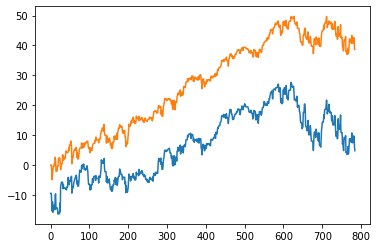

In [501]:
roi['total'].plot()
big_table_invested['result_SP500'].plot()

In [488]:
df.columns

Index(['Data', 'price_usd', 'exch_rate', 'price_eur'], dtype='object')

In [490]:
period_1 = int(current.sort_values('date')['date'][0].timestamp())
period_2 = int(datetime.now().timestamp())
spy = parse_stock('^GSPC', period_1, period_2)
spy = spy.rename({'Adj Close':'price_usd'}, axis = 1)
df = spy.merge(eurx, on = 'Data', how = 'inner')[['Data','price_usd','exch_rate' ]]
df['price_eur'] = df['price_usd'] * df['exch_rate']
big_table_invested['price_eur_SP500']= big_table_invested.merge(df, on='Data', how = 'left')['price_eur']

In [493]:
big_table_invested = big_table_invested.fillna(method = 'ffill')

In [496]:
big_table_invested['roi_SP500'] = big_table_invested['price_eur_SP500'].pct_change()
big_table_invested['cumsum_roi_SP500'] = big_table_invested['roi_SP500'].cumsum()

In [499]:
big_table_invested['my_spy_SP500'] = big_table_invested['cumsum_roi_SP500']*big_table_invested['total']

In [500]:
big_table_invested['result_SP500'] = big_table_invested['my_spy_SP500']/big_table_invested['total']*100

In [480]:
df

,Data,price_usd,exch_rate,price_eur,roi,cumsum_roi,invested,my_spy,result
0,2020-04-17,2874.560059,0.920940,2647.297341,NaN,NaN,78.50,NaN,NaN
1,2020-04-20,2823.159912,0.920220,2597.928214,-0.018649,-0.018649,78.50,-1.463937,-1.864888
2,2020-04-21,2736.560059,0.920400,2518.729878,-0.030485,-0.049134,78.50,-3.857024,-4.913407
3,2020-04-22,2799.310059,0.921110,2578.472488,0.023719,-0.025415,78.50,-1.995056,-2.541473
4,2020-04-23,2797.800049,0.925100,2588.244825,0.003790,-0.021625,78.50,-1.697543,-2.162476
5,2020-04-24,2836.739990,0.927900,2632.211037,0.016987,-0.004638,78.50,-0.364073,-0.463787
6,2020-04-27,2878.479980,0.923900,2659.427654,0.010340,0.005702,78.50,0.447604,0.570196
7,2020-04-28,2863.389893,0.923800,2645.199583,-0.005350,0.000352,78.50,0.027625,0.035191
8,2020-04-29,2939.510010,0.922800,2712.579837,0.025473,0.025825,78.50,2.027228,2.582456
9,2020-04-30,2912.429932,0.919350,2677.542458,-0.012917,0.012908,78.50,1.013273,1.290793


In [289]:
amount_of_stock = {}
for i in keys:
    stock = groups.get_group(i).reset_index(drop = True)
    suma = 0
    for i in range(len(stock)):
        suma += stock.iloc[i][2]
    amount_of_stock[stock.iloc[0][-2]] = suma

In [279]:
stock

,date,time,number,price,price_eu,exchange_rate,commission,ticker,pair_currency
11,2020-06-03 21:18:00,21:18,1,49.18,-43.74,1.1244,-0.50,XOM,EUR=X
12,2020-09-02 21:27:00,21:27,1,39.10,-33.03,1.1837,-0.50,XOM,EUR=X
13,2020-10-26 19:44:00,19:44,2,33.15,-56.12,1.1814,-0.51,XOM,EUR=X


In [320]:
a_s = pd.DataFrame.from_dict(amount_of_stock, orient = 'index', columns = ['amount'])

In [351]:
big_table_eur['result'] = big_table_eur.sum(1)

In [361]:
big_table_eur

,Data,AAPL,BABA,BRK-B,CRM,FTNT,GILD,INTC,JNJ,JPM,LFC,META,MSFT,NEE,NVDA,PG,PYPL,SAIL,SWCH,TME,TTE,V,VRNT,WMT,XOM,YNDX,total
0,2020-04-17,0.000000,0.000000,0.000000,0.000000,0.000000,-0.094980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.094980
1,2020-04-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-04-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-04-20,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125081
4,2020-04-21,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154309
5,2020-04-22,0.000000,0.000000,0.000000,0.000000,0.000000,-0.123696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.123696
6,2020-04-23,0.000000,0.000000,0.000000,0.000000,0.000000,-0.158109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.158109
7,2020-04-24,0.000000,0.000000,0.000000,0.000000,0.000000,-0.135367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.135367
8,2020-04-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2020-04-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [307]:
len(big_table_eur.columns)

26

In [363]:
#служит для проверки отдельных компаний
stock = current[current['ticker'] == 'XOM']
period_1 = int(stock.iloc[0][0].timestamp())
period_2 = int(datetime.now().timestamp())
yahoo_stock = parse_stock(stock.iloc[0][-2], period_1, period_2)
yahoo_stock = yahoo_stock.rename({'Adj Close':'price_usd'}, axis = 1)
df = yahoo_stock.merge(eurx, on = 'Data', how = 'inner')[['Data','price_usd','exch_rate' ]]
df['price_eur'] = df['price_usd'] * df['exch_rate']
small_table_eur = profit_eur(df,stock)

In [364]:
small_table_eur

,Data,gain_with_curr,invested,return_in_cash
0,2020-06-03,-0.111489,43.74,-4.87653
1,2020-06-04,-0.117683,43.74,-5.14747
2,2020-06-05,-0.0547373,43.74,-2.39421
3,2020-06-08,-0.0235953,43.74,-1.03206
4,2020-06-09,-0.0441786,43.74,-1.93237
5,2020-06-10,-0.0975615,43.74,-4.26734
6,2020-06-11,-0.17961,43.74,-7.85613
7,2020-06-12,-0.156279,43.74,-6.83566
8,2020-06-15,-0.154113,43.74,-6.7409
9,2020-06-16,-0.141632,43.74,-6.19499


In [375]:
stock = current[current['ticker'] == 'INTC']